# Import data, EDA

### Import and filtering

In [45]:
import numpy as np
from tabulate import tabulate
import pandas as pd


# Importing data from csv file provided to df
file_path = 'sales.csv'
ironkaggle_df = pd.read_csv(file_path)

# # Display the first few rows of the DataFrame
# print(ironkaggle_df.head())
# print(ironkaggle_df.dtypes)
# print(ironkaggle_df.describe())
# print(ironkaggle_df.columns)


In [46]:
# <!-- | **Variable**           | **Type**         | **Details**                              |
# |-------------------------|------------------|------------------------------------------|
# | `store_ID`             | Categorical     | Nominal, unique store identifiers        |
# | `day_of_week`          | Categorical     | Represents days of the week   |
# | `date`                 | Ordinal         | Nominal (date) |
# | `nb_customers_on_day`  | Numerical       | number of customers          |
# | `open`                 | Categorical     | Binary, open or closed         |
# | `promotion`            | Categorical     | Binary, promotion status                 |
# | `state_holiday`        | Categorical     | Binary, holiday status                  |
# | `school_holiday`       | Categorical     | Binary, holiday status                   |
# | `sales`                | Numerical       | Continuous, sales revenue                | 

categorical_var = ['store_ID', 'day_of_week', 'open', 'promotion', 'state_holiday', 'school_holiday']
date_var = ['date']
numerical_var = ['nb_customers_on_day', 'sales']

# I will drop the untitled column, bc I don't know what it is. 
ironkaggle_df = ironkaggle_df.drop(columns=['Unnamed: 0'])

# Converting the 'date' column to datetime
ironkaggle_df['date'] = pd.to_datetime(ironkaggle_df['date'])

# Count the number of unique values in a column
unique_values = ironkaggle_df['state_holiday'].unique()
print(f"Unique values in the column: {unique_values}")

# Remapping 'state_holiday'
# Unique values in the column: ['0' 'a' 'c' 'b'] converting to ['0' '1' '2 '3']. 
# Define the mapping
mapping = {'0': '0', 'a': '1', 'c': '2', 'b': '3'}

# Apply the mapping to the column
ironkaggle_df['state_holiday'] = ironkaggle_df['state_holiday'].map(mapping)
# converting to int
ironkaggle_df['state_holiday'] = ironkaggle_df['state_holiday'].astype('int64')

# Categorical var
for col in categorical_var:
    unique_count = ironkaggle_df[col].nunique()
    print(f"The column '{col}' has {unique_count} unique values.")

Unique values in the column: ['0' 'a' 'c' 'b']
The column 'store_ID' has 1115 unique values.
The column 'day_of_week' has 7 unique values.
The column 'open' has 2 unique values.
The column 'promotion' has 2 unique values.
The column 'state_holiday' has 4 unique values.
The column 'school_holiday' has 2 unique values.


In [47]:
# Filter rows where 'open' is 0
closed_sales = ironkaggle_df[ironkaggle_df['open'] == 0]['sales']

# Summary statistics for 'sales' when 'open' is 0
closed_sales_summary = closed_sales.describe()
# print(closed_sales_summary)

# There are no sales when stores are closed. These rows do not provide insights for sales analysis
# I will remove them from the dataset. 

# Remove rows where 'open' is 0 and 'sales' is also 0
ironkaggle_df_filtered = ironkaggle_df[~((ironkaggle_df['open'] == 0) & (ironkaggle_df['sales'] == 0))]
# Drop the entire 'open' feature
ironkaggle_df_filtered = ironkaggle_df_filtered.drop(columns=['open'])
categorical_var.remove('open')

## EDA

In [48]:
# For the numerical var, what are their descriptive statistics?
# For the Categorical var, what are their counts? 


def calculate_descriptive_stats(df, column):
    """
    Calculates descriptive statistics for a given column of a DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The column name for which to calculate statistics.

    Returns:
        pd.DataFrame: A DataFrame containing the calculated statistics.
    """
    # Calculate statistics
    stats = {
        "Statistic": [
            "Mean",
            "Median",
            "Mode",
            "Range",
            "Variance",
            "Standard Deviation",
            "Interquartile Range (IQR)",
            "Skewness",
            "Kurtosis",
            "Minimum",
            "Maximum",
            "Sum",
            "Count",
            "25th Percentile",
            "75th Percentile",
        ],
        "Value": [
            df[column].mean(),
            df[column].median(),
            df[column].mode()[0] if not df[column].mode().empty else np.nan,
            df[column].max() - df[column].min(),
            df[column].var(),
            df[column].std(),
            df[column].quantile(0.75) - df[column].quantile(0.25),
            df[column].skew(),
            df[column].kurt(),
            df[column].min(),
            df[column].max(),
            df[column].sum(),
            df[column].count(),
            df[column].quantile(0.25),
            df[column].quantile(0.75),
        ],
    }

    # Create a DataFrame
    stats_df = pd.DataFrame(stats)

    # Print neatly using tabulate
    # print(tabulate(stats_df, headers='keys', tablefmt='grid', showindex=False))

    return stats_df

def calculate_stats_for_multiple_columns(df, columns):
    """
    Calculates descriptive statistics for multiple columns and stores them in a dictionary.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        columns (list): List of column names to calculate statistics for.

    Returns:
        dict: A dictionary where keys are column names and values are DataFrames of statistics.
    """
    results = {}
    for column in columns:
        # print(f"\nDescriptive Statistics for {column}:")
        stats_df = calculate_descriptive_stats(df, column)
        results[column] = stats_df
    return results

# Example Usage
# Assuming `df` is your DataFrame and `numerical_var` is a list of numerical columns
numerical_var = ['nb_customers_on_day', 'sales']
results = calculate_stats_for_multiple_columns(ironkaggle_df_filtered, numerical_var)

# grouping by store
# Group 'sales' by 'store_ID' and compute aggregate statistics
grouped_sales = ironkaggle_df_filtered.groupby('store_ID')['sales'].agg(['sum', 'mean', 'median', 'count', 'max', 'min']).reset_index()

# Display the grouped DataFrame
# print(grouped_sales)

In [49]:
import matplotlib.pyplot as plt

# Plot sum and means to see distributions
# Extracting data for plotting
store_count = len(grouped_sales["store_ID"])
sums = grouped_sales["sum"]
mean = grouped_sales["mean"]

# Convert sums to millions and means to thousands
sums_in_millions = [x / 1_000_000 for x in sums]
means_in_thousands = [x / 1_000 for x in mean]

# Create a single figure for all 4 plots
plt.figure(figsize=(14, 10))

# Histogram for sum of sales
plt.subplot(2, 2, 1)
n, bins, patches = plt.hist(sums_in_millions, bins=10, alpha=0.8, edgecolor='black')
for i in range(len(n)):
    plt.text((bins[i] + bins[i + 1]) / 2, n[i], str(int(n[i])), ha='center', va='bottom')
plt.title("Histogram of Sum of Sales (in Millions)")
plt.xlabel("Sum of Sales (in Millions)")
plt.ylabel("Store Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Histogram for mean sales
plt.subplot(2, 2, 2)
n, bins, patches = plt.hist(means_in_thousands, bins=10, alpha=0.8, edgecolor='black', color='orange')
for i in range(len(n)):
    plt.text((bins[i] + bins[i + 1]) / 2, n[i], str(int(n[i])), ha='center', va='bottom')
plt.title("Histogram of Mean Sales (in Thousands)")
plt.xlabel("Mean Sales (in Thousands)")
plt.ylabel("Store Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Box plot for sum of sales
plt.subplot(2, 2, 3)
plt.boxplot(sums, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Box Plot of Sum of Sales")
plt.xlabel("Sum of Sales (in Dollars)")

# Box plot for mean of sales
plt.subplot(2, 2, 4)
plt.boxplot(mean, vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title("Box Plot of Mean Sales")
plt.xlabel("Mean Sales (in Dollars)")

plt.tight_layout()
# plt.show()

# Save the plot to png
plt.savefig("figures/1_sales_distribution_summary.png", dpi=300, bbox_inches="tight")  
plt.close()  # Close the figure to prevent it from displaying in Jupyter

### Correlation Matrix

In [50]:
import seaborn as sns

correlation_matrix = ironkaggle_df_filtered.select_dtypes(include=['float64', 'int64']).corr()

# SVisualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,        # Display correlation values on the heatmap
    cmap="coolwarm",   # Color map for visualization
    fmt=".2f",         # Format to 2 decimal places
    linewidths=0.5     # Add space between cells
)
plt.title("Correlation Matrix Heatmap for numerical var")

# Save plot to png
plt.savefig("figures/2_Correlation_Matrix_Heatmap_for_numerical_var.png", dpi=300, bbox_inches="tight")
plt.close() # Close the figure to prevent it from displaying in Jupyter
#plt.show()




High Correlation Between nb_customers_on_day and sales (0.82): strong positive linear relationship. It suggests that an increase in the number of customers on a day is strongly associated with an increase in sales. 
Moderate Correlation Between promotion and sales (0.37): positive relationship, albeit weaker than with customer numbers. This implies that promotions have a noticeable, but not overwhelming, impact on sales.

Weak Correlations with school_holiday: school_holiday shows very weak correlations with other variables, including sales (0.04). This suggests that school holidays might not significantly impact sales or customer behavior in this dataset.

Negative Correlation Between day_of_week and promotion/sales (-0.29 and -0.18):  negative correlation with day_of_week suggests that certain days of the week might have fewer promotions or lower sales.

In [51]:
# Droppng 'school_holiday' column bc very weak corr.
ironkaggle_df_filtered = ironkaggle_df_filtered.drop(columns=['school_holiday'])


# Modelling

In [52]:
target_variable = 'sales'

charges_mean = round(ironkaggle_df_filtered[target_variable].mean(), 2)
print(f"The mean of our target variable '{target_variable}' is {charges_mean}")

# Establishing a naive baseline in regression provides a simple benchmark for model performance. 
# It helps identify if a model is adding value by exagerating trivial predictions, showing overfitting or underfitting. 
# Without a baseline, it's difficult to evaluate MSE or R2 and determine if a model is effective or shoudl be improved.

The mean of our target variable 'sales' is 6959.25


## Initial Modelling Without GridSearch or Pipeline

Simple linear regression model without any feature engineering, grid search, or pipeline. This will serve as our initial baseline for comparison.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


### LOADING INFORMATION ###

# Creating a copy of the DataFrame
ironkaggle_df_filtered_copy = ironkaggle_df_filtered.copy()



# Initialize a list to store the results
results = []

# Filter out columns that are not used for regression
features_to_plot = [
    col for col in ironkaggle_df_filtered_copy.columns 
    if col != target_variable and col != 'date'
]

# Loop through the filtered columns
for idx, feature in enumerate(features_to_plot):
    print(f"\nPerforming Linear Regression for Feature: {feature}")
    
    # Define the feature (X) as a single column
    X = ironkaggle_df_filtered_copy[[feature]]
    y = ironkaggle_df_filtered_copy[[target_variable]]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append the results for the current feature
    results.append([feature, mse, r2])
    
    # Plot for the current feature
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color="blue", label="Actual Data")
    plt.plot(X, model.predict(X), color="red", label="Regression Line")
    plt.title(f"Linear Regression: {target_variable} vs {feature}")
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.legend(loc="upper right")
    plt.grid(linestyle="--", alpha=0.7)
    
    # Save the plot with a unique filename
    plot_filename = f"figures/{idx + 1}_linear_regression_{feature}_vs_{target_variable}.png"
    plt.savefig(plot_filename, dpi=300, bbox_inches="tight")
    plt.close()  # Close the figure to avoid overlap

# Create and print a table with the results
headers = ["Feature", "Mean Squared Error (MSE)", "R-squared (R2)"]
print("\nSummary of Results:")
print(tabulate(results, headers=headers, tablefmt="grid"))


Performing Linear Regression for Feature: store_ID

Performing Linear Regression for Feature: day_of_week

Performing Linear Regression for Feature: nb_customers_on_day

Performing Linear Regression for Feature: promotion

Performing Linear Regression for Feature: state_holiday

Summary of Results:
+---------------------+----------------------------+------------------+
| Feature             |   Mean Squared Error (MSE) |   R-squared (R2) |
+=====================+============================+==================+
| store_ID            |                9.61296e+06 |     -4.61505e-05 |
+---------------------+----------------------------+------------------+
| day_of_week         |                9.30502e+06 |      0.0319894   |
+---------------------+----------------------------+------------------+
| nb_customers_on_day |                3.09097e+06 |      0.678444    |
+---------------------+----------------------------+------------------+
| promotion           |                8.29821e+06 

nb_customers_on_day has the lowest MSE (3.09e+06), meaning it's the best-performing feature.
Features like store_ID, state_holiday, and year have high MSEs (close to 9.6e+06), indicating they contribute little to reducing prediction error.

In [55]:
# dropping 'store_ID' and 'state_holiday' to improve model performance.
ironkaggle_df_re_filtered_copy = ironkaggle_df_filtered.copy().drop(columns=['store_ID', 'state_holiday'])

# The data to be used from now on is ironkaggle_dataset

ironkaggle_dataset = ironkaggle_df_re_filtered_copy


In [ ]:
# Linear Regression

# Initialize a list to store the results
results = []

# Loop through all columns in the DataFrame except the target variable and 'date'
for feature in ironkaggle_dataset.columns:
    # Skip the target variable or 'date' as in the datetime date
    if feature == target_variable or feature == 'date':
        continue
    
    print(f"\nPerforming Linear Regression for Feature: {feature}")
    
    # Define the feature (X) as a single column
    X = ironkaggle_dataset[[feature]]
    y = ironkaggle_dataset[[target_variable]]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append the results for the current feature
    results.append([feature, mse, r2])
    
    # # Visualize the regression line
    # plt.figure(figsize=(8, 6))
    # plt.scatter(X, y, color="blue", label="Actual Data")
    # plt.plot(X, model.predict(X), color="red", label="Regression Line")
    # plt.title(f"Linear Regression: {target_variable} vs {feature}")
    # plt.xlabel(feature)
    # plt.ylabel(target_variable)
    # plt.legend()
    # plt.grid(linestyle="--", alpha=0.7)
    # plt.show()

# Create and print a table with the results
headers = ["Feature", "Mean Squared Error (MSE)", "R-squared (R2)"]
print("\nSummary of Results:")
print(tabulate(results, headers=headers, tablefmt="grid"))


Performing Linear Regression for Feature: day_of_week

Performing Linear Regression for Feature: nb_customers_on_day

Performing Linear Regression for Feature: promotion

Summary of Results:
+---------------------+----------------------------+------------------+
| Feature             |   Mean Squared Error (MSE) |   R-squared (R2) |
+=====================+============================+==================+
| day_of_week         |                9.30502e+06 |        0.0319894 |
+---------------------+----------------------------+------------------+
| nb_customers_on_day |                3.09097e+06 |        0.678444  |
+---------------------+----------------------------+------------------+
| promotion           |                8.29821e+06 |        0.136729  |
+---------------------+----------------------------+------------------+


### Feature Analysis

<table>
    <thead>
        <tr>
            <th style="font-size:7px;">Feature</th>
            <th style="font-size:7px;">Analysis</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="font-size:7px;"><b>day_of_week</b></td>
            <td style="font-size:7px;">Weak predictor (R² = 0.032). There may be small weekly trends, but it adds minimal value.</td>
        </tr>
        <tr>
            <td style="font-size:7px;"><b>nb_customers_on_day</b></td>
            <td style="font-size:7px;">Strongest predictor (R² = 0.678). Explains most of the variance in the target. This feature is essential.</td>
        </tr>
        <tr>
            <td style="font-size:7px;"><b>promotion</b></td>
            <td style="font-size:7px;">Moderate predictor (R² = 0.137). Indicates that promotions positively impact the target variable (likely sales).</td>
        </tr>
        <tr>
            <td style="font-size:7px;"><b>year</b></td>
            <td style="font-size:7px;">Very weak predictor (R² = 0.0013). Likely irrelevant unless there are long-term trends.</td>
        </tr>
        <tr>
            <td style="font-size:7px;"><b>month</b></td>
            <td style="font-size:7px;">Weak predictor (R² = 0.0059). Minimal seasonal or monthly impact.</td>
        </tr>
    </tbody>
</table>


## Modelling with Pipeline and Grid Search

- Create a pipeline that includes scaling and linear regression
- Define a parameter grid for hyperparameter tuning
- Use GridSearchCV to find the best parameters and evaluate the model performance


### LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Define the features (X) and target (y)
X = ironkaggle_dataset.drop(columns=[target_variable, 'date'])
y = ironkaggle_dataset[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),       # Scale features
    ('regressor', LinearRegression())   # Apply Linear Regression
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"LinearRegression, Mean Squared Error (MSE): {mse:.2f}")
print(f"LinearRegression, R-squared (R2): {r2:.2f}")



LinearRegression, Mean Squared Error (MSE): 2603502.31
LinearRegression, R-squared (R2): 0.73


###  Gradient Boosting Regressor Pipeline 

- Create and use a pipeline for Gradient Boosting Regressor
- Define a parameter grid for grid search
- Use GridSearchCV to find the best parameters and evaluate the model

In [61]:
# pipeline for Gradient Boosting Regressor

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the features (X) and target (y)
X = ironkaggle_dataset.drop(columns=[target_variable, 'date'])
y = ironkaggle_dataset[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),                 # Scale features
    ('regressor', GradientBoostingRegressor(      # Gradient Boosting
        n_estimators=100,                         # Hyperparameter: Number of boosting stages
        learning_rate=0.1,                        # Hyperparameter: Learning rate
        max_depth=3,                              # Hyperparameter: Maximum depth of trees
        random_state=42                           # For reproducibility
    ))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting Regressor, Mean Squared Error (MSE): {mse:.2f}")
print(f"Gradient Boosting Regressor, R-squared (R2): {r2:.2f}")

Gradient Boosting Regressor, Mean Squared Error (MSE): 2228942.77
Gradient Boosting Regressor, R-squared (R2): 0.77


In [65]:
# Use GridSearchCV to find the best parameters and evaluate the model

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import time

# Define the features (X) and target (y), make training set
X = ironkaggle_dataset.drop(columns=[target_variable, 'date'])
y = ironkaggle_dataset[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and their parameter grids
models_and_parameters = [
    {
        'model': [LinearRegression()],
        'model__fit_intercept': [True, False]
    },
    {
        'model': [GradientBoostingRegressor()],
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.05, 0.1],
        'model__max_depth': [3, 5]
    },
    {
        'model': [RandomForestRegressor()],
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10],
        'model__min_samples_split': [2, 5]
    }
]

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize the data
    ('model', LinearRegression())  
])

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline, 
    param_grid=models_and_parameters, 
    cv=5,  # n-fold cross-validation
    scoring='r2', 
    n_jobs=-1 
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Model:", best_model)
print("Best Parameters:", best_params)
print(f"Test Set Mean Squared Error (MSE): {mse:.2f}")
print(f"Test Set R-squared (R2): {r2:.2f}")

# Create a simpler filename using a fixed prefix and timestamp
timestamp = int(time.time())
best_model_filename = f"best_model_{timestamp}_ironkaggle.pkl"

# Saving model
joblib.dump(best_model, best_model_filename)
print(f"Model '{best_model_filename}' saved successfully.")

Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.05, max_depth=5,
                                           n_estimators=200))])
Best Parameters: {'model': GradientBoostingRegressor(), 'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__n_estimators': 200}
Test Set Mean Squared Error (MSE): 2220112.62
Test Set R-squared (R2): 0.77
Model 'best_model_1737229049_ironkaggle.pkl' saved successfully.


### XGBoost

In [74]:
# using xgboost with GPU acceleration (only with NVIDIA GPU)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score


# Define the features (X) and target (y)
X = ironkaggle_dataset.drop(columns=[target_variable, 'date'])
y = ironkaggle_dataset[target_variable]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize the features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Initialize the XGBoost regressor
model = xgb.XGBRegressor(
    n_estimators=100,                   # Number of trees
    learning_rate=0.1,                  # Step size shrinkage
    max_depth=6,                        # Maximum tree depth
    random_state=42,                    # Reproducibility
    objective='reg:squarederror',       # Regression loss function
    early_stopping_rounds=10,           # Early Stopping prevents overfitting and reduces training time    
    tree_method='hist',                 # Use GPU-based histogram algorithm (NVIDIA GPU)
    # predictor='gpu_predictor',          # Use GPU for prediction (NVIDIA GPU)
    device='cuda'    
)

# Train the model with an evaluation set and verbose output
model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],     # Use test set as evaluation set
    verbose=False                    # Print evaluation metric at each stage
)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Create a filename using a fixed prefix and a timestamp
timestamp = int(time.time())
model_filename = f"xgboost_{timestamp}_ironkaggle.pkl"

# Save the model using joblib
joblib.dump(model, model_filename)
print(f"Model_'{model_filename}' saved successfully.")

Mean Squared Error (MSE): 2247417.25
R-squared (R²): 0.77
Model_'xgboost_1737250532_ironkaggle.pkl' saved successfully.


### xgboost modified w Optuna

In [ ]:
!pip install optuna

import optuna
print(optuna.__version__)

In [ ]:
import pandas as pd
import xgboost as xgb
import optuna
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the features (X) and target (y)
X = ironkaggle_dataset.drop(columns=[target_variable, 'date'])
y = ironkaggle_dataset[target_variable]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize the features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


def objective(trial):
    # Define hyperparameter search space
    param = {
        'objective': 'reg:squarederror',
        'tree_method': 'gpu_hist',                                  # GPU acceleration
        'device': 'cuda',                                           # Enable GPU training
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        # 'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        # 'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        # 'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'nthread': -1,
        'seed': 42
    }

    # Create DMatrix for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)

    # Perform cross-validation
    cv_results = xgb.cv(
        params=param,
        dtrain=dtrain,
        num_boost_round=500, 
        nfold=5,
        early_stopping_rounds=10,
        metrics=['rmse', 'mae'], 
        seed=42,
        verbose_eval=False
    )

    # Use the best RMSE as the objective to minimize
    best_rmse = cv_results['test-rmse-mean'].min()
    return best_rmse

# Create an Optuna study and optimize the objective
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Best trial:")
trial = study.best_trial
print(f"  RMSE: {trial.value}")
print("  Best hyperparameters: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")
    

# Retrieve best hyperparameters
best_params = study.best_trial.params
best_params.update({
    'objective': 'reg:squarederror',
    'tree_method': 'gpu_hist',  # Use GPU training
    'device': 'cuda',           # Enable GPU
    'seed': 42
})

# # Initialize final model with best parameters

final_model = xgb.XGBRegressor(
    **best_params,
    n_estimators=1000
)

# Create evaluation set for early stopping
eval_set = [(X_test, y_test)]

# Train final model
final_model.fit(
    X_train, 
    y_train,
    eval_set=eval_set,
    verbose=False
)

# Predict and evaluate on test set
y_pred = final_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Final Model MSE: {mse:.2f}")
print(f"Final Model R2: {r2:.2f}")

# If you want to plot feature importance, uncomment and adjust:
xgb.plot_importance(final_model, max_num_features=5, importance_type='gain')
plt.title('Top 5 Feature Importances')
plt.show()

# Save plot (requires prior plotting and valid variables)
# For example, after plotting importance, you could save:
plot_filename = f"figures/top_5_Feature_Importances_{int(time.time())}.png"
plt.savefig(plot_filename, dpi=300, bbox_inches="tight")
plt.close()

# Create a filename using a fixed prefix and a timestamp
timestamp = int(time.time())
model_filename = f"xgboost_optuna_{timestamp}_ironkaggle.pkl"

# Save the model using joblib
joblib.dump(final_model, model_filename)
print(f"'{model_filename}' saved successfully.")

### Timeseries forecasting with Regression and Prophet - TODO

In [106]:
# timeseries forecasting deals with sequential data points indexed by time.
# Observations are usually dependent on previous time steps
# attempt to predict sales, so we will drop all the columns except 'sales' and 'date', which will become index

from datetime import timedelta
from matplotlib.ticker import FuncFormatter

# Importing data from csv file provided to df
file_path = 'sales.csv'
ironkaggle_df = pd.read_csv(file_path)

# There are no sales when stores are closed. These rows do not provide insights for sales analysis
# I will remove them from the dataset. 
ironkaggle_df = ironkaggle_df[~((ironkaggle_df['open'] == 0) & (ironkaggle_df['sales'] == 0))]

# drop everythigng except 'sales' and 'date'
sales_by_date_df = ironkaggle_df[['date', 'sales']].copy() 

# Converting the 'date' column to datetime
sales_by_date_df['date'] = pd.to_datetime(sales_by_date_df['date'])

# group 'sales' by 'date'
sales_by_date_df = sales_by_date_df.groupby('date')['sales'].sum().reset_index()

# # Plot 'sales' over time
# sales_by_date_df.plot(x='date', y='sales', style="-", figsize=(15, 5), title="Sales ($) v time")
# plt.ylabel('sales ($)')
# plt.show()

# Set 'date' as the index to create a Datetime Index
sales_by_date_df = sales_by_date_df.set_index('date')

# Define the function to add time-based features
def createTimeFeatures(df):
    df["day_of_week"] = df.index.dayofweek  # Day of the week (0=Monday, 6=Sunday)
    df["quarter"] = df.index.quarter        # Quarter of the year
    df["month"] = df.index.month            # Month
    df["year"] = df.index.year              # Year
    df["day_of_year"] = df.index.dayofyear  # Day of the year

# Apply the function to add time features
createTimeFeatures(sales_by_date_df)

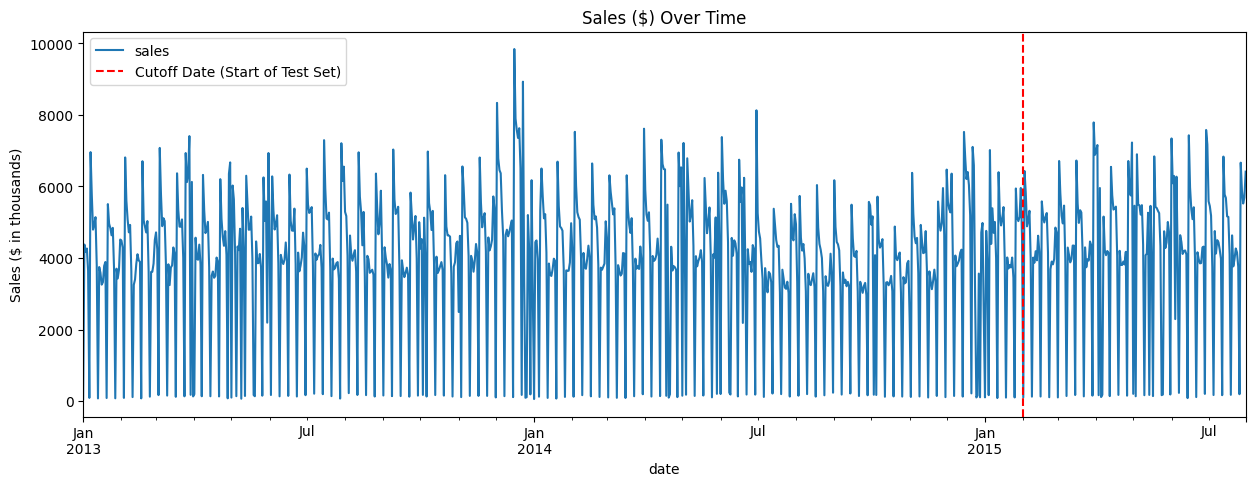

In [109]:
# Split the data, we will use the last 6 months as our dataset.
# Get the most recent date in the dataset
last_date = sales_by_date_df.index.max()

# Calculate the cutoff date for the last 6 months in the dataset
cutOffDate = last_date - timedelta(days=6 * 30)  # Approximate 6 months (30 days/month)
# print(f"Cutoff Date for Last 6 Months: {cutOffDate}")

# Split the data into train and test sets
train = sales_by_date_df.loc[sales_by_date_df.index < cutOffDate]  # All dates before the last 6 months
test = sales_by_date_df.loc[sales_by_date_df.index >= cutOffDate]  # Last 6 months of data

# print(f"Train size: {len(train)} rows, Test size: {len(test)} rows")

# Define a function to format the y-axis in thousands
def format_y_axis(x, _):
    return f'{x / 1000:.0f}'

# Plot the data with the split
fig, ax = plt.subplots(figsize=(15, 5))
sales_by_date_df[["sales"]].plot(style="-", ax=ax, title="Sales ($) Over Time")
ax.set_ylabel('Sales ($ in thousands)')

# Format the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Add a vertical red line for the cutoff date
plt.axvline(x=cutOffDate, color='r', linestyle='--', label='Cutoff Date (Start of Test Set)')
plt.legend()
plt.show()

#  func to show the error betwne the actual value and predicted value as a percentage
def meanAbsolutErrorAaPercentage(real, predicted):
    real = np.array(real)
    predicted = np.array(predicted)

    return np.mean(np.abs((real - predicted) / real)) * 100

# define features and target as separate arrays
FEATURES = ["day_of_week", "quarter", "month", "year", "day_of_year"]
TARGET = "sales"

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [110]:
# define and XGB regressor, fit it on our train data and use it to predict our test data
regressor = xgb.XGBRegressor(n_estimators=1000, early_stoppin_rounds=50, learning_rate=0.01)

regressor.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100)
regressorOutput = regressor.predict(X_test)

prediction = pd.DataFrame(data=regressorOutput, index=X_test.index, columns=["prediction"])

sales_by_date_df = sales_by_date_df.merge(prediction, how="left", left_index=True, right_index=True)

# predictions are at the end of the dataframe
# sales_by_date_df.tail()

[0]	validation_0-rmse:1939780.03135	validation_1-rmse:2045071.44893
[100]	validation_0-rmse:1179951.62763	validation_1-rmse:1382283.06943
[200]	validation_0-rmse:991936.81888	validation_1-rmse:1240932.25062


c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [00:07:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "early_stoppin_rounds" } are not used.

  warnings.warn(smsg, UserWarning)


[300]	validation_0-rmse:914056.44287	validation_1-rmse:1203676.64517
[400]	validation_0-rmse:840456.71777	validation_1-rmse:1165924.74600
[500]	validation_0-rmse:776280.48150	validation_1-rmse:1139952.59946
[600]	validation_0-rmse:728757.38237	validation_1-rmse:1128315.61102
[700]	validation_0-rmse:673389.91555	validation_1-rmse:1101254.56417
[800]	validation_0-rmse:611868.93972	validation_1-rmse:1082749.99294
[900]	validation_0-rmse:565369.07251	validation_1-rmse:1076873.21874
[999]	validation_0-rmse:532075.47496	validation_1-rmse:1076312.32620


percentage error: 81.7570


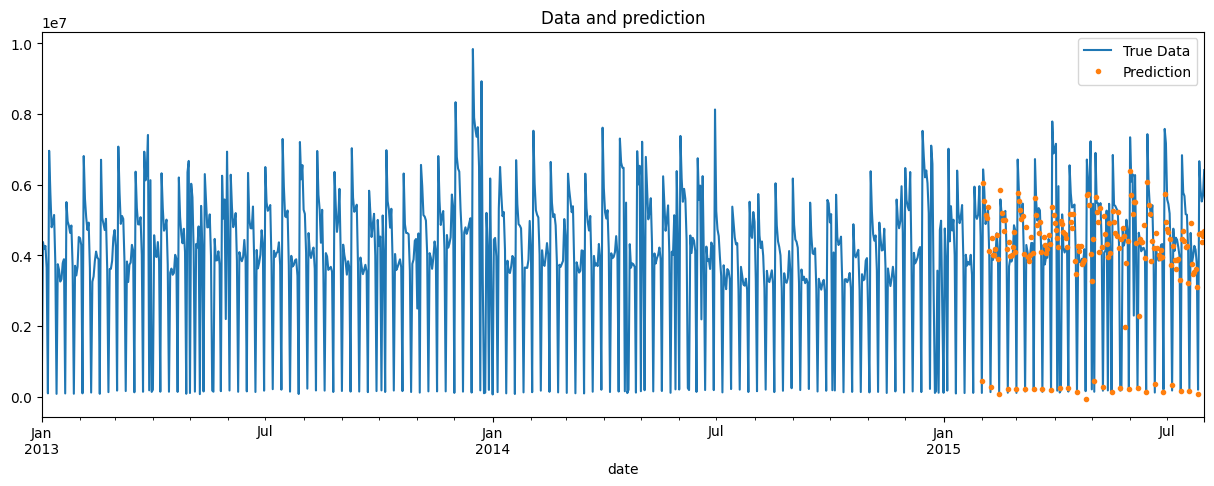

In [111]:
# calculate the error 
# select the part of the data frame that is our test part
testDf = sales_by_date_df.loc[sales_by_date_df.index > cutOffDate]

yReal = testDf["sales"]
yPredicted = testDf["prediction"]

print(f"percentage error: {meanAbsolutErrorAaPercentage(yReal, yPredicted):.4f}")

ax = sales_by_date_df[[TARGET]].plot(figsize=(15,5))
sales_by_date_df["prediction"].plot(ax=ax, style=".")
ax.legend(["True Data", "Prediction"])
ax.set_title("Data and prediction")
plt.show()



In [137]:
from prophet import Prophet

#  drop features and rename columns
FEATURES = ["day_of_week", "quarter", "month", "year", "day_of_year"]

# Reset index and prepare Prophet-compatible train dataset
prophetTrain = train.reset_index()
prophetTrain.drop(FEATURES, axis=1, inplace=True) 
prophetTrain.rename(columns={"date": "ds", "sales": "y"}, inplace=True)
# prophetTrain.tail()

# Reset index and prepare Prophet-compatible test dataset
prophetTest = test.reset_index()
prophetTest.drop(FEATURES, axis=1, inplace=True)
prophetTest.rename(columns={"date": "ds", "sales": "y"}, inplace=True)
# prophetTest.tail()

# # Verify column names
print(f"prophetTest columns: {prophetTest.columns}")
print(f"prophetTrain columns: {prophetTrain.columns}")

# Create and fit the Prophet model

# prophetModel = Prophet()
# prophetModel.fit(prophetTrain)

# prophetPrediction = prophetModel.predict(prophetTest)


# # Extract real and predicted values
# yRealProphet = test[["sales"]]
# print(type(yRealProphet))
# # print(yRealProphet.columns)
# # print(yRealProphet.head())
# # print(yRealProphet.index)
# # print(yRealProphet.dtype)

# yPredictedProphet = prophetPrediction[["yhat"]]


# # Define percentage error calculation
# def meanAbsoluteErrorAsPercentage(y_true, y_pred):
#     return (abs(y_true - y_pred) / y_true).mean() * 100

# # Print percentage error
# # print(f"Prophet percentage error: {meanAbsoluteErrorAsPercentage(yRealProphet, yPredictedProphet):.4f}")


prophetTest columns: Index(['ds', 'y'], dtype='object')
prophetTrain columns: Index(['ds', 'y'], dtype='object')


### Deep Neural Network

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tabulate import tabulate
import numpy as np

# Define the features (X) and target (y)
X = ironkaggle_dataset.drop(columns=[target_variable, 'date'])
y = ironkaggle_dataset[target_variable]

# Split the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to float32 for efficiency
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Build the model
model = Sequential()

# Input layer and first hidden layer with L2 regularization and Dropout
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))  # Dropout with 20% rate

# Second hidden layer with L2 regularization and Dropout
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))

# Third hidden layer
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))

# Output layer for regression
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']
)

# Callbacks for Early Stopping and Learning Rate Tuning
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Fit the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)

# Predict and calculate custom metrics
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print evaluation results as a table
evaluation_data = [
    ["Metric", "Value"],
    ["R²", f"{r2:.4f}"],
    ["RMSE", f"{rmse:.4f}"],
    ["Mean Absolute Error (MAE)", f"{test_mae:.4f}"],
    ["Test Loss (MSE)", f"{test_loss:.4f}"]
]
print(tabulate(evaluation_data, headers="firstrow", tablefmt="grid"))

# Create a filename using a fixed prefix and a timestamp
timestamp = int(time.time())
model_filename = f"keras_{timestamp}_ironkaggle.pkl"

# Save the model using joblib
joblib.dump(model, model_filename)
print(f"'{model_filename}' saved successfully.")



X_train shape: (425612, 3)
y_train shape: (425612,)
Epoch 1/50


c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10641/10641 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 7647718.0000 - mae: 1765.1017 - val_loss: 2343651.2500 - val_mae: 1094.2239 - learning_rate: 0.0010
Epoch 2/50
10641/10641 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 2802834.5000 - mae: 1207.9679 - val_loss: 2334087.7500 - val_mae: 1094.8766 - learning_rate: 0.0010
Epoch 3/50
10641/10641 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 2770874.0000 - mae: 1201.2030 - val_loss: 2334945.2500 - val_mae: 1094.2540 - learning_rate: 0.0010
Epoch 4/50
10641/10641 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 2789817.0000 - mae: 1202.0398 - val_loss: 2332482.7500 - val_mae: 1089.2449 - learning_rate: 0.0010
Epoch 5/50
10641/10641 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 2779477.0000 - mae: 1199.8616 - val_loss: 2343309.0000 - val_mae: 1089.3975 - learning_rate: 0.0010
Epoch 6/50
10641/10641 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 2771638.5000 - mae: 1197.3422 - val_loss: 2355791.2500 - val_mae: 1089.6414 - learning_rate: 0.0010
Epoch 7/50
10639/1064

# Prediction -- TODO

In [ ]:
# use for prediction

import pandas as pd

# Importing data into df
file_path = 'REAL_DATA_PROCESSED.csv'

# Load the CSV file into a DataFrame
ironkaggle_real_df = pd.read_csv(file_path)


categorical_var = ['store_ID', 'day_of_week', 'open', 'promotion', 'state_holiday', 'school_holiday']
date_var = ['date']
numerical_var = ['nb_customers_on_day', 'sales']

# I will drop the untitled column, bc I don't know what it is. 
ironkaggle_real_df = ironkaggle_real_df.drop(columns=['index'])

# Converting the 'date' column to datetime
ironkaggle_real_df['date'] = pd.to_datetime(ironkaggle_real_df['date'], dayfirst=True)

# Count the number of unique values in a column
unique_values = ironkaggle_real_df['state_holiday'].unique()
# print(f"Unique values in the column: {unique_values}")
 
# Unique values in the column: ['0' 'a' 'c' 'b']
# Converting 'state_holiday' ['0' '1' '2 '3']. 

# Define the mapping
mapping = {'0': '0', 'a': '1', 'c': '2', 'b': '3'}

ironkaggle_real_df['year'] = ironkaggle_real_df['date'].dt.year
ironkaggle_real_df['month'] = ironkaggle_real_df['date'].dt.month
ironkaggle_real_df['day'] = ironkaggle_real_df['date'].dt.day

ironkaggle_real_df = ironkaggle_real_df.drop(columns=['date'])

# Apply the mapping to the column
ironkaggle_real_df['state_holiday'] = ironkaggle_real_df['state_holiday'].map(mapping)

# converting to int
ironkaggle_real_df['state_holiday'] = ironkaggle_real_df['state_holiday'].astype('int64')

# Remove rows where 'open' is 0 
ironkaggle_real_df = ironkaggle_real_df[((ironkaggle_real_df['open'] == 0)) ]
                                       
# Drop the entire 'open' feature
ironkaggle_real_df = ironkaggle_real_df.drop(columns=['open'])
categorical_var.remove('open')

# Drop the entire 'state_holiday' feature
ironkaggle_real_df = ironkaggle_real_df.drop(columns=['state_holiday'])
categorical_var.remove('state_holiday')

# Drop the entire 'school_holiday' feature
ironkaggle_real_df = ironkaggle_real_df.drop(columns=['school_holiday'])
categorical_var.remove('school_holiday')

# # Drop the entire 'day' feature
# ironkaggle_real_df = ironkaggle_real_df.drop(columns=['day'])
# categorical_var.remove('day')

print(ironkaggle_real_df.dtypes)
print(ironkaggle_real_df.columns.tolist())

# sales_predictions = model.predict(ironkaggle_real_df)
